In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


This is the method we followed to clean up the images.
1. We took the *phase* image 
2. Converted it to grayscale
3. Increased the contrast.


In [2]:
# Read the image
image = cv2.imread('')
image2 = cv2.imread('D:\\Pranav\\Pictures\\Saved D:\\Pranav\\Pictures\\Saved Pictures\\1_amplitude.jpgPictures\\1_phase.jpg') 
mask = np.zeros_like(image2)
# Convert the image to grayscale
gray_amp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_phase = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

# histogram equalisation (increases contrast)
#equalized_image_phase = cv2.equalizeHist(gray_phase)

#CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized_image_phase = clahe.apply(gray_phase)

#

#thresholding
_, thresholded = cv2.threshold(equalized_image_phase, 130, 255, cv2.THRESH_BINARY)


# Apply edge detection using Canny
edges = cv2.Canny(gray_amp,200, 300, apertureSize=3)
edges2 = cv2.Canny(gray_phase,65,75,apertureSize=3)

# Find contours in the binary image
#contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# draw contours
#cv2.drawContours(mask, contours, -1, (255,255,255), thickness=1)
plt.set_cmap("grey")
plt.figure(figsize=(21,10))
plt.subplot(2,4,1)
plt.imshow(equalized_image_phase)
#plt.subplot(2,4,2)
# plt.imshow(thresholded)
# plt.subplot(2,4,3)
#plt.imshow(mask)

plt.show()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


4. First approach
* Remove the line noise 
* Apply thresholding 

5. Second approach
* Use K means clustering on contrasted phase image to extract useful items.

C:\Users\Pranav\AppData\Local\Temp\ipykernel_13928\1383084426.py:13: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_no_horizontal = 20*np.log(np.abs(fshift))


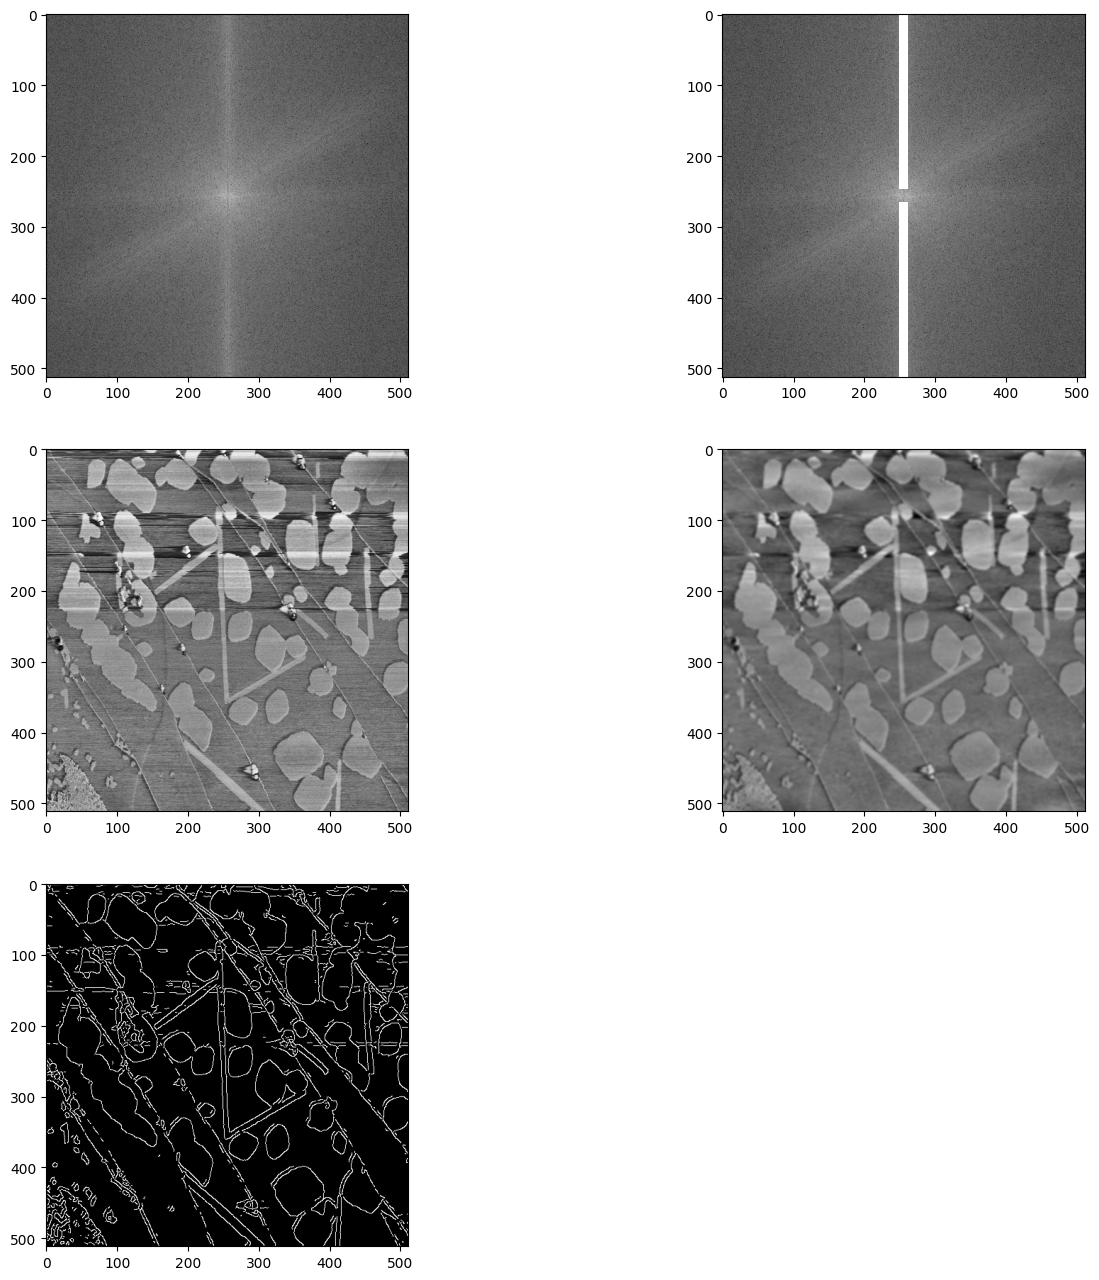

In [ ]:
# reduce line noise
plt.figure(figsize=(16,16))
f = np.fft.fft2(equalized_image_phase)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(3,2,1)
plt.imshow(magnitude_spectrum)

rows, cols = equalized_image_phase.shape
crow,ccol = rows//2 , cols//2
fshift[0:crow-10, ccol-5:ccol+5] = 0
fshift[crow+10:, ccol-5:ccol+5] = 0
magnitude_spectrum_no_horizontal = 20*np.log(np.abs(fshift))
plt.subplot(3,2,2)
plt.imshow(magnitude_spectrum_no_horizontal)

# get the spatial domain back
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)


plt.subplot(3,2,3)
plt.imshow(equalized_image_phase)
plt.subplot(3,2,4)
plt.imsave('./image.jpg', img_back)
denoise = cv2.imread('./image.jpg')
mask2 = np.zeros_like(denoise)
denoise = cv2.cvtColor(denoise, cv2.COLOR_RGB2GRAY)
#denoise = cv2.equalizeHist(gray_phase)
blurred_image = cv2.GaussianBlur(denoise, (7,7), 0)
plt.imshow(blurred_image)

edges3 = cv2.Canny(blurred_image, 50,60, apertureSize=3)
_, thresholded = cv2.threshold(denoise, 125, 255, cv2.THRESH_BINARY)
plt.subplot(3,2,5)
plt.imshow(edges3)

In [ ]:
# Clustering
img = np.array(equalized_image_phase)
clusters, _ = cv2.kmeans(img, 16, None, cv2.TERM_CRITERIA_COUNT, 10, cv2.KMEANS_RANDOM_CENTERS)

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'kmeans'
> Overload resolution failed:
>  - Can't parse 'criteria' as TermCriteria.Input argument doesn't provide sequence protocol
>  - Can't parse 'criteria' as TermCriteria.Input argument doesn't provide sequence protocol
